In [1]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

For the linear least squares method we solve the equation 

$$
A^TA p = A^T y
$$

where $A$ is a matrix of our independent variables as well as a column of ones, p is the projection of our data onto the model and $y$ is the dependent variables. $p$ can then be used as our line of best fit.

For part b) we will let $X$ be a matrix of mean centered data, we can perform the SVD 

$$X = U \Sigma V^T$$

then we can defind our covarience as 

$$C = X^T X$$

We can perform SVD on the covarience matrix

$$X^TX = V \Sigma U^T U \Sigma V^T = V \Sigma^2 V^T$$

This first row of the $V^T$ matrix from SVD of our mean centered data matrix represents the direction of most variation which is like the line of best fit. 

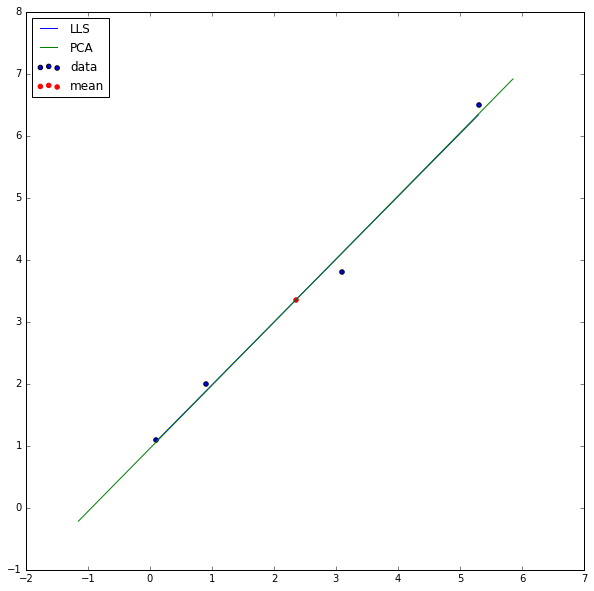

In [2]:
x = np.array([0.1, 0.9, 3.1, 5.3])
y = np.array([1.1, 2.0, 3.8, 6.5])

# LLS Methods
A = np.zeros((len(x), 2))
A[:, 0] = np.ones(A.shape[0])
A[:, 1] = x 

coeff = np.linalg.solve(A.T.dot(A), A.T.dot(y))

x_pts = np.linspace(min(x), max(x))

fit_y = coeff[0] + coeff[1]*x_pts

# SVD Methods
data = np.concatenate((x[:, np.newaxis], y[:, np.newaxis]), axis = 1)

datamean = np.mean(data, axis = 0)

_, _, vv = np.linalg.svd(data - datamean)

linepts = vv[0] * np.mgrid[-5:5:2j][:, np.newaxis]

linepts += datamean

plt.figure(figsize=(10,10))
plt.scatter(*data.T, label='data')
plt.scatter(*datamean, color='r', label='mean')
plt.plot(x_pts, fit_y, label = 'LLS')
plt.plot(*linepts.T, label = 'PCA')
plt.legend(loc=0)

Not that these two lines are actually different though they appear to be the same. This can be show by making one of the points an outlier.

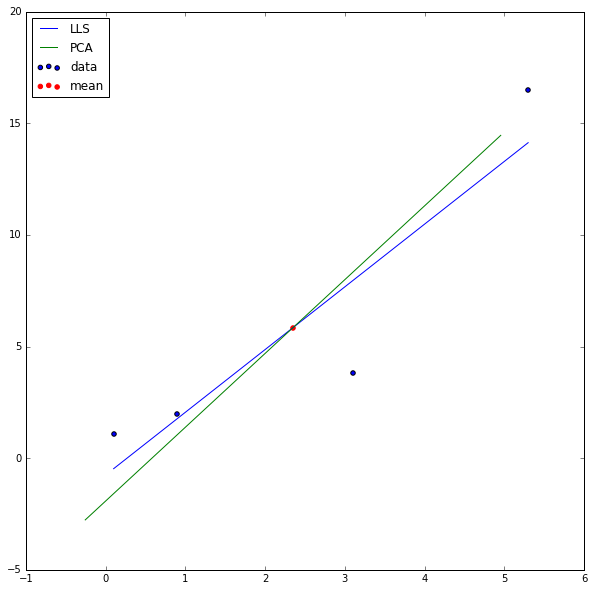

In [3]:
x = np.array([0.1, 0.9, 3.1, 5.3])
y = np.array([1.1, 2.0, 3.8, 16.5])

# LLS Methods
A = np.zeros((len(x), 2))
A[:, 0] = np.ones(A.shape[0])
A[:, 1] = x 

coeff = np.linalg.solve(A.T.dot(A), A.T.dot(y))

x_pts = np.linspace(min(x), max(x))

fit_y = coeff[0] + coeff[1]*x_pts

# SVD Methods
data = np.concatenate((x[:, np.newaxis], y[:, np.newaxis]), axis = 1)

datamean = np.mean(data, axis = 0)

_, _, vv = np.linalg.svd(data - datamean)

linepts = vv[0] * np.mgrid[-9:9:2j][:, np.newaxis]

linepts += datamean

plt.figure(figsize=(10,10))
plt.scatter(*data.T, label='data')
plt.scatter(*datamean, color='r', label='mean')
plt.plot(x_pts, fit_y, label = 'LLS')
plt.plot(*linepts.T, label = 'PCA')
plt.legend(loc=2)